In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
print("تم استيراد المكتبات بنجاح")
print("TensorFlow Version:",tf.__version__)

تم استيراد المكتبات بنجاح
TensorFlow Version: 2.19.0


In [ ]:
print("جاري تحميل البيانات")
(x_test,y_test),(x_train,y_train)=mnist.load_data()
print(x_train.shape," الحجم الاولي لبيانات التدريب (قبل المعالجة): ")
print(x_test.shape," الحجم الاولي لبيانات الاختبار (قبل الاختبار): ")
x_train_processed = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test_processed = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
print("/n !تم اضافة البعد الرابع وتبيع البيانات بنجاح ")
print(x_train_processed.shape ,"(بعد المعالجة)حجم بيانات التدريب")
print(x_test_processed.shape ,"(بعد المعالجة)حجم بيانات الاختبار")


جاري تحميل البيانات
(10000, 28, 28)  الحجم الاولي لبيانات التدريب (قبل المعالجة): 
(60000, 28, 28)  الحجم الاولي لبيانات الاختبار (قبل الاختبار): 
/n !تم اضافة البعد الرابع وتبيع البيانات بنجاح 
(10000, 28, 28, 1) (بعد المعالجة)حجم بيانات التدريب
(60000, 28, 28, 1) (بعد المعالجة)حجم بيانات الاختبار


In [ ]:

#  تصميم نموذج الـ CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')

])

#  تجميع النموذج
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# ==============================================================================
# الخلية رقم 4: تدريب الموديل باستخدام زيادة البيانات (Data Augmentation)
# ==============================================================================

print("\n" + "="*60)
print("[الجزء 4] بدء تدريب الموديل المطور (مع زيادة البيانات)")
print("="*60 + "\n")

# 1. إعداد أداة زيادة البيانات (Data Augmentation)
# ---------------------------------------------------
# سنقوم بتعريف التشويهات التي نريد تطبيقها على صور التدريب

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,       # تدوير الصورة عشوائيًا بزاوية تصل إلى 10 درجات
    width_shift_range=0.1,   # إزاحة الصورة أفقيًا بنسبة تصل إلى 10% من عرضها
    height_shift_range=0.1,  # إزاحة الصورة رأسيًا بنسبة تصل إلى 10% من ارتفاعها
    zoom_range=0.1,          # تكبير/تصغير الصورة بنسبة تصل إلى 10%
    shear_range=0.1          # تطبيق قص (تحويل مائل) على الصورة
)

# تطبيق الأداة على بيانات التدريب
datagen.fit(x_train_processed)

# 2. تدريب الموديل باستخدام البيانات الجديدة

# -------------------------------------------
# بدلاً من model.fit العادية، سنستخدم model.fit مع الأداة الجديدة
# ستقوم الأداة بإنشاء دفعات (batches) من الصور المشوهة في الوقت الفعلي وإرسالها للموديل
# قد يستغرق التدريب وقتًا أطول قليلاً لأن هناك معالجة إضافية تحدث
history = model.fit(
    datagen.flow(x_train_processed, y_train, batch_size=64), # استخدام أداة زيادة البيانات
    epochs=10,  # زدنا عدد الدورات إلى 10 لأن الموديل يرى بيانات أكثر تنوعًا الآن
    validation_data=(x_test_processed, y_test) # بيانات التحقق تبقى كما هي بدون تشويه
)

print("\n" + "="*60)
print("🎉 انتهى تدريب الموديل المطور بنجاح! 🎉")
print("="*60)



[الجزء 4] بدء تدريب الموديل المطور (مع زيادة البيانات)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.8573 - loss: 0.4815 - val_accuracy: 0.9700 - val_loss: 0.1039
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9318 - loss: 0.2173 - val_accuracy: 0.9713 - val_loss: 0.0952
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9496 - loss: 0.1552 - val_accuracy: 0.9697 - val_loss: 0.1038
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9583 - loss: 0.1329 - val_accuracy: 0.9717 - val_loss: 0.0930
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9606 - loss: 0.1226 - val_accuracy: 0.9639 - val_loss: 0.1215
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.9622 - loss: 0.1180 - val_accuracy: 0.9722 - val_loss: 0.0930
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9667 - loss: 0.1051 - val_accuracy: 0.9758 - val_loss: 0.0787
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9677 - loss: 0.0925 - val_accuracy: 0.976

In [ ]:

# اختبار النموذج الأصلي (قبل الحفظ)
print("\n[الجزء 1] تقييم الموديل الأصلي...")
loss, acc = model.evaluate(x_test_processed, y_test, verbose=2)
print(f"\nTest accuracy (Original Model){acc*100:.2f}%")

#  حفظ الموديل المدرب
model_filename = 'digit_recognition_model.keras'
model.save(model_filename)
print(f"\n[الجزء 1] تم حفظ الموديل بنجاح في ملف '{model_filename}'")



[الجزء 1] تقييم الموديل الأصلي...
1875/1875 - 4s - 2ms/step - accuracy: 0.9729 - loss: 0.0905

Test accuracy (Original Model)97.29%

[الجزء 1] تم حفظ الموديل بنجاح في ملف 'digit_recognition_model.keras'


In [ ]:
from google.colab import files
print("my_multi_digit.png")
uploaded =files.upload()
if len(uploaded.keys()) > 0:
  IMAGE_FILE_TO_TEST=list(uploaded.keys())[0]
  print("تم رفع الصورة بنجاح",'IMAGE_FILE_TO_TEST')
else:
  print("لم يتم الحف رفع اي ملف")
  IMAGE_FILE_TO_TEST=None

my_multi_digit.png


--- بدء اختبار الصورة: perfect_9 (1).png ---
تم تحميل الموديل المحفوظ بنجاح.
تم العثور على 1 كائن/رقم في الصورة.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step

الرقم المتوقع بالكامل هو: 7


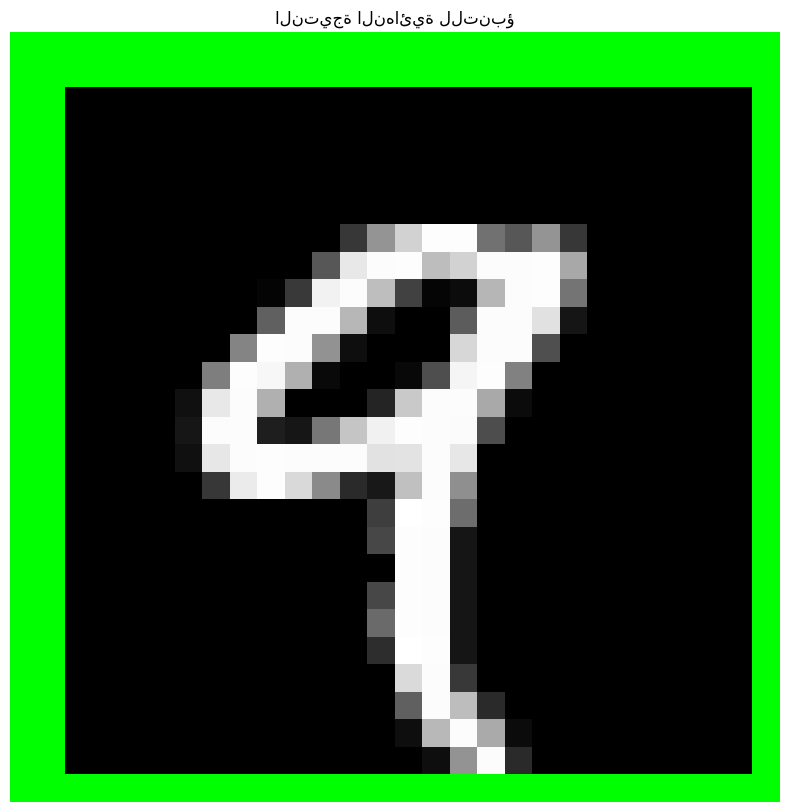

In [ ]:

# الخطوة 7: اختبار الموديل على الصورة الخارجية التي تم رفعها

# التحقق من أن هناك صورة تم رفعها في الخلية السابقة
if IMAGE_FILE_TO_TEST is not None:
    print(f"--- بدء اختبار الصورة: {IMAGE_FILE_TO_TEST} ---")

    # 1. تحميل الموديل المحفوظ
    try:
        loaded_model = load_model('digit_recognition_model.keras')
        print("تم تحميل الموديل المحفوظ بنجاح.")
    except Exception as e:
        print(f"خطأ في تحميل الموديل: {e}")
        # نتوقف هنا إذا لم يتم تحميل الموديل
        raise

    # 2. قراءة الصورة التي تم رفعها ومعالجتها

    image = cv2.imread(IMAGE_FILE_TO_TEST, cv2.IMREAD_GRAYSCALE)
    # عكس الألوان (لأن cv2 يقرأ الأبيض كـ 255 والأسود كـ 0)
    image_inverted = cv2.bitwise_not(image)
    # إنشاء نسخة ملونة من الصورة لعرض النتائج عليها
    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # 3. إيجاد الكفاف (Contours) للأرقام في الصورة
    contours, _ = cv2.findContours(image_inverted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # فرز الكفاف من اليسار إلى اليمين
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

    print(f"تم العثور على {len(contours)} كائن/رقم في الصورة.")



    # 4. المرور على كل كفاف (رقم) والتنبؤ به
    final_prediction = ""
    for contour in contours:
        # الحصول على إحداثيات المربع المحيط بالرقم
        (x, y, w, h) = cv2.boundingRect(contour)

        # قص صورة الرقم من الصورة الكبيرة
        digit_roi = image_inverted[y:y+h, x:x+w]

        # إضافة حواف للصورة لجعلها مربعة
        h, w = digit_roi.shape
        diff = abs(h - w)
        padding_top = diff // 2
        padding_bottom = diff - padding_top
        if h > w:
            padded_digit = cv2.copyMakeBorder(digit_roi, 0, 0, padding_top, padding_bottom,

cv2.BORDER_CONSTANT, value=0)
        else:
            padded_digit = cv2.copyMakeBorder(digit_roi, padding_top, padding_bottom, 0, 0, cv2.BORDER_CONSTANT, value=0)

        # تغيير حجم الصورة إلى 28x28 وتجهيزها للموديل
        resized_digit = cv2.resize(padded_digit, (28, 28))
        processed_digit = resized_digit.astype('float32') / 255
        final_digit = np.expand_dims(processed_digit, axis=-1)
        final_digit = np.expand_dims(final_digit, axis=0)

        # 5. التنبؤ بالرقم باستخدام الموديل المحمل
        prediction = loaded_model.predict(final_digit)

        predicted_label = np.argmax(prediction)
        final_prediction += str(predicted_label)

        # 6. رسم المربع والتنبؤ على الصورة الملونة
        cv2.rectangle(output_image, (x, y), (x+w, y+h), (0, 255, 0), 2) # مربع أخضر
        cv2.putText(output_image, str(predicted_label), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # 7. عرض النتيجة النهائية
    print("\n" + "="*30)
    print(f"الرقم المتوقع بالكامل هو: {final_prediction}")
    print("="*30)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

    plt.title("النتيجة النهائية للتنبؤ")
    plt.axis('off')
    plt.show()

else:
    print("لا توجد صورة للاختبار. يرجى تشغيل الخلية السابقة (رقم 6) أولاً.")
    model.save("my_model.h5")
